# WeatherPy

---

## Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import datetime

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 584


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"
units = "metric"
query_url = f"{url}appid={weather_api_key}&units={units}&q="
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = query_url + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        #Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | clyde river
Processing Record 2 of Set 1 | upernavik
Processing Record 3 of Set 1 | nazarovo
Processing Record 4 of Set 1 | omboue
Processing Record 5 of Set 1 | hermanus
Processing Record 6 of Set 1 | caravelas
Processing Record 7 of Set 1 | uruana
Processing Record 8 of Set 1 | viedma
Processing Record 9 of Set 1 | progreso
Processing Record 10 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 11 of Set 1 | coquimbo
Processing Record 12 of Set 1 | granadilla de abona
Processing Record 13 of Set 1 | hovd
Processing Record 14 of Set 1 | fare
Processing Record 15 of Set 1 | kodiak
Processing Record 16 of Set 1 | rikitea
Processing Record 17 of Set 1 | kavieng
Processing Record 18 of Set 1 | sorvag
City not found. Skipping...
Processing Record 19 of Set 1 | atuona
Processing Record 20 of Set 1 | broome
Processing Record 21 of Set 1 | lazaro cardenas
Processing Record 22 of Set 1 | 

Processing Record 38 of Set 4 | manggar
Processing Record 39 of Set 4 | bandundu
Processing Record 40 of Set 4 | kangaatsiaq
Processing Record 41 of Set 4 | vanimo
Processing Record 42 of Set 4 | pevek
Processing Record 43 of Set 4 | srednekolymsk
Processing Record 44 of Set 4 | roma
Processing Record 45 of Set 4 | mirandela
Processing Record 46 of Set 4 | bogorodskoye
Processing Record 47 of Set 4 | chuy
Processing Record 48 of Set 4 | bay roberts
Processing Record 49 of Set 4 | esperance
Processing Record 0 of Set 5 | castro
Processing Record 1 of Set 5 | grand river south east
City not found. Skipping...
Processing Record 2 of Set 5 | seoul
Processing Record 3 of Set 5 | shache
Processing Record 4 of Set 5 | guerrero negro
Processing Record 5 of Set 5 | inverness
Processing Record 6 of Set 5 | husavik
Processing Record 7 of Set 5 | klaksvik
Processing Record 8 of Set 5 | chipata
Processing Record 9 of Set 5 | bilma
Processing Record 10 of Set 5 | lebu
Processing Record 11 of Set 5 |

Processing Record 23 of Set 8 | samarai
Processing Record 24 of Set 8 | borama
City not found. Skipping...
Processing Record 25 of Set 8 | sharlyk
Processing Record 26 of Set 8 | mangochi
Processing Record 27 of Set 8 | juegang
Processing Record 28 of Set 8 | hongjiang
Processing Record 29 of Set 8 | krasnoselkup
Processing Record 30 of Set 8 | amga
Processing Record 31 of Set 8 | yaan
Processing Record 32 of Set 8 | yichang
Processing Record 33 of Set 8 | voh
Processing Record 34 of Set 8 | coulihaut
City not found. Skipping...
Processing Record 35 of Set 8 | mantua
Processing Record 36 of Set 8 | vondrozo
Processing Record 37 of Set 8 | boksitogorsk
Processing Record 38 of Set 8 | tuatapere
Processing Record 39 of Set 8 | norman wells
Processing Record 40 of Set 8 | gulbene
Processing Record 41 of Set 8 | necochea
Processing Record 42 of Set 8 | belfast
Processing Record 43 of Set 8 | rassvet
Processing Record 44 of Set 8 | kirakira
Processing Record 45 of Set 8 | axim
Processing Rec

Processing Record 10 of Set 12 | kloulklubed
Processing Record 11 of Set 12 | yatou
Processing Record 12 of Set 12 | aleksandrovsk-sakhalinskiy
Processing Record 13 of Set 12 | quatre cocos
Processing Record 14 of Set 12 | louisbourg
City not found. Skipping...
Processing Record 15 of Set 12 | makokou
Processing Record 16 of Set 12 | raudeberg
Processing Record 17 of Set 12 | gaoual
Processing Record 18 of Set 12 | khandyga
Processing Record 19 of Set 12 | mincivan
Processing Record 20 of Set 12 | buin
Processing Record 21 of Set 12 | atasu
Processing Record 22 of Set 12 | lubao
Processing Record 23 of Set 12 | los llanos de aridane
Processing Record 24 of Set 12 | jardim
Processing Record 25 of Set 12 | albanel
Processing Record 26 of Set 12 | sioux lookout
Processing Record 27 of Set 12 | martvili
Processing Record 28 of Set 12 | vastervik
City not found. Skipping...
Processing Record 29 of Set 12 | iralaya
Processing Record 30 of Set 12 | juifang
City not found. Skipping...
Processi

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          532
Lat           532
Lng           532
Max Temp      532
Humidity      532
Cloudiness    532
Wind Speed    532
Country       532
Date          532
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,clyde river,70.4692,-68.5914,-23.87,64,100,3.60,CA,1677089720
1,upernavik,72.7868,-56.1549,-23.59,90,100,12.09,GL,1677089723
2,nazarovo,56.0064,90.3914,-15.08,99,56,2.23,RU,1677089724
3,omboue,-1.5746,9.2618,26.62,84,82,3.16,GA,1677089725
4,hermanus,-34.4187,19.2345,18.78,73,22,4.44,ZA,1677089726


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,clyde river,70.4692,-68.5914,-23.87,64,100,3.60,CA,1677089720
1,upernavik,72.7868,-56.1549,-23.59,90,100,12.09,GL,1677089723
2,nazarovo,56.0064,90.3914,-15.08,99,56,2.23,RU,1677089724
3,omboue,-1.5746,9.2618,26.62,84,82,3.16,GA,1677089725
4,hermanus,-34.4187,19.2345,18.78,73,22,4.44,ZA,1677089726


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

In [25]:
# Set today's date for title
today = datetime.datetime.today().strftime("(%Y-%m-%d)")

# Set figure size
plt.rcParams["figure.figsize"] = (9,6)

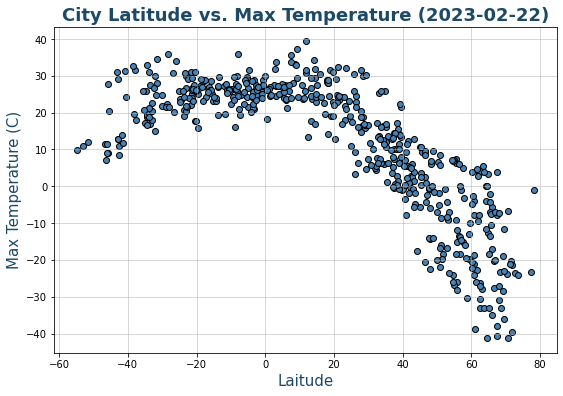

In [26]:
# Build scatter plot for latitude vs. temperature

plt.scatter(city_data_df['Lat'],city_data_df['Max Temp'],facecolor = "steelblue", edgecolor = "black")

# Incorporate the other graph properties

# Set title
plt.title(f"City Latitude vs. Max Temperature {today}", fontsize = 18, fontweight="bold", color = "#1c4966")

# Set x axis label
plt.xlabel("Laitude", fontsize = 15, color = "#1c4966")

# Set y axis label
plt.ylabel("Max Temperature (C)", fontsize = 15, color = "#1c4966")

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the figure
plt.savefig("output_data/latitude_vs_temperature.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

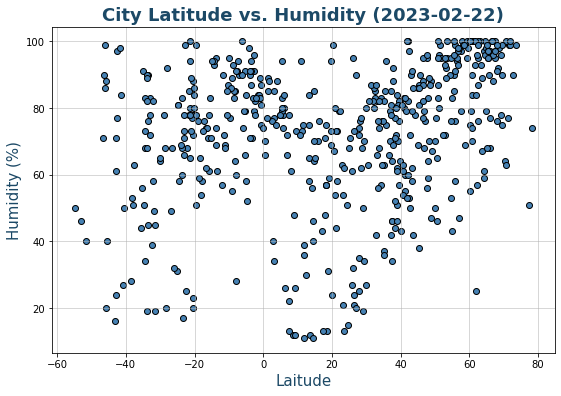

In [27]:
# Build the scatter plots for latitude vs. humidity

plt.scatter(city_data_df['Lat'],city_data_df['Humidity'],facecolor = "steelblue", edgecolor = "black")

# Incorporate the other graph properties

# Set title
plt.title(f"City Latitude vs. Humidity {today}", fontsize = 18, fontweight="bold", color = "#1c4966")

# Set x axis label
plt.xlabel("Laitude", fontsize = 15, color = "#1c4966")

# Set y axis label
plt.ylabel("Humidity (%)", fontsize = 15, color = "#1c4966")

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the figure
plt.savefig("output_data/latitude_vs._humidity.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

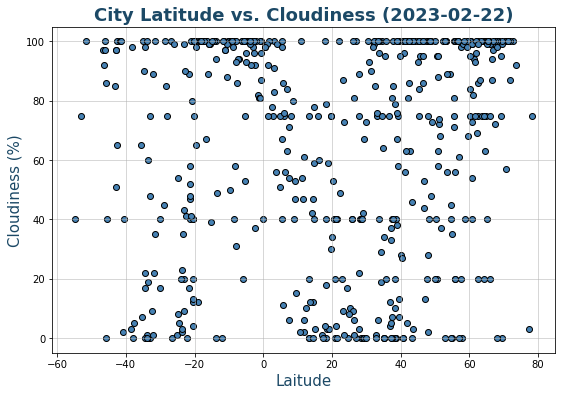

In [28]:
# Build the scatter plots for latitude vs. cloudiness

plt.scatter(city_data_df['Lat'],city_data_df['Cloudiness'],facecolor = "steelblue", edgecolor = "black")

# Incorporate the other graph properties

# Set title
plt.title(f"City Latitude vs. Cloudiness {today}", fontsize = 18, fontweight="bold", color = "#1c4966")

# Set x axis label
plt.xlabel("Laitude", fontsize = 15, color = "#1c4966")

# Set y axis label
plt.ylabel("Cloudiness (%)", fontsize = 15, color = "#1c4966")

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the figure
plt.savefig("output_data/latitude_vs._cloudiness.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

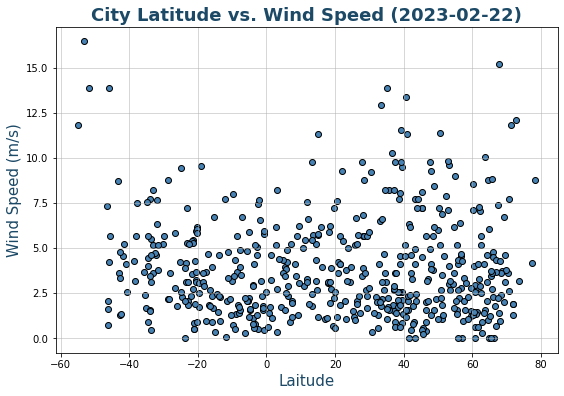

In [29]:
# Build the scatter plots for latitude vs. wind speed

plt.scatter(city_data_df['Lat'],city_data_df['Wind Speed'],facecolor = "steelblue", edgecolor = "black")

# Incorporate the other graph properties

# Set title
plt.title(f"City Latitude vs. Wind Speed {today}", fontsize = 18, fontweight="bold", color = "#1c4966")

# Set x axis label
plt.xlabel("Laitude", fontsize = 15, color = "#1c4966")

# Set y axis label
plt.ylabel("Wind Speed (m/s)", fontsize = 15, color = "#1c4966")

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the figure
plt.savefig("output_data/latitude_vs._wind speed.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [30]:
# Define a function to create Linear Regression plots
def linear_regression(x_values,y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    print(f"The r-value is: {round(rvalue,4)}")
    #plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
    return line_eq
    
# Define a fuction for annotating
def annotate(line_eq, a, b):
    plt.annotate(line_eq,(a,b),fontsize=15,color="red")    

In [31]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,clyde river,70.4692,-68.5914,-23.87,64,100,3.60,CA,1677089720
1,upernavik,72.7868,-56.1549,-23.59,90,100,12.09,GL,1677089723
2,nazarovo,56.0064,90.3914,-15.08,99,56,2.23,RU,1677089724
8,progreso,21.2833,-89.6667,32.28,44,4,5.64,MX,1677089729
10,granadilla de abona,28.1188,-16.5760,16.37,76,40,5.66,ES,1677089733


In [32]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"]<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,omboue,-1.5746,9.2618,26.62,84,82,3.16,GA,1677089725
4,hermanus,-34.4187,19.2345,18.78,73,22,4.44,ZA,1677089726
5,caravelas,-17.7125,-39.2481,28.62,58,100,3.64,BR,1677089727
6,uruana,-15.4981,-49.6875,24.99,83,99,1.69,BR,1677089727
7,viedma,-40.8135,-62.9967,31.26,27,2,4.09,AR,1677089728


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.863


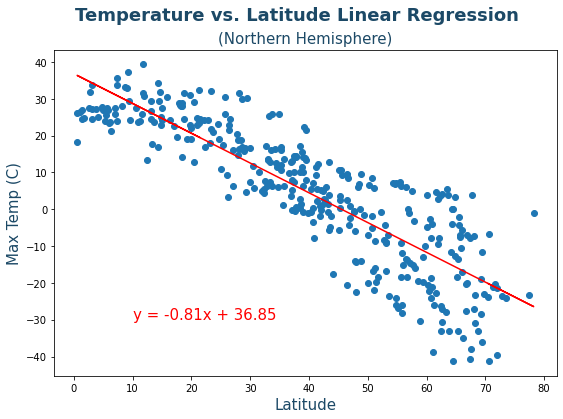

In [33]:
# Linear regression on Northern Hemisphere
# Call regression fcn
n_plot = linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])

# Call annotate fcn
annotate(n_plot, 10, -30)

# Set a title
plt.suptitle("Temperature vs. Latitude Linear Regression",fontsize = 18, fontweight="bold", color = "#1c4966")
plt.title("(Northern Hemisphere)",fontsize = 15, color = "#1c4966" )

# Set xlabel
plt.xlabel("Latitude", fontsize = 15, color = "#1c4966")

# Set ylabel
plt.ylabel("Max Temp (C)", fontsize = 15, color = "#1c4966")

# Save the figure
plt.savefig("output_data/N_Hemisphere_Temp_vs._Lat.png")

# Show plot
plt.show()

**Discussion about the linear relationship:** There is a strong negative correlation between latitude and max temperature for the northern hemisphere.

The r-value is: 0.4619


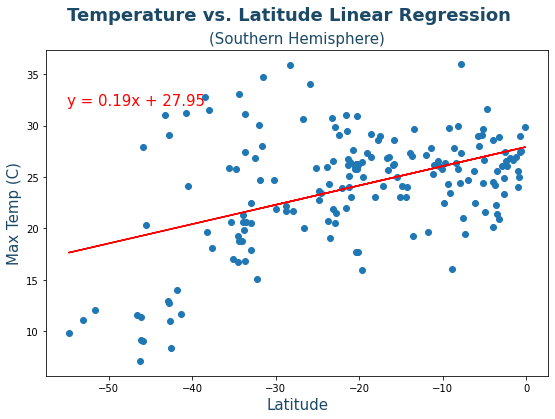

In [34]:
# Linear regression on Southern Hemisphere
# Call regression fcn
s_plot = linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"])

# Call annotate fcn
annotate(s_plot, -55, 32)

# Set a title
plt.suptitle("Temperature vs. Latitude Linear Regression",fontsize = 18, fontweight="bold", color = "#1c4966")
plt.title("(Southern Hemisphere)",fontsize = 15, color = "#1c4966" )

# Set xlabel
plt.xlabel("Latitude", fontsize = 15, color = "#1c4966")

# Set ylabel
plt.ylabel("Max Temp (C)", fontsize = 15, color = "#1c4966")

# Save the figure
plt.savefig("output_data/S_Hemisphere_Temp_vs._Lat.png")

# Show plot
plt.show()

**Discussion about the linear relationship:** There is a moderate positive correlation between latitude and max temperature for the southern hemisphere.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.467


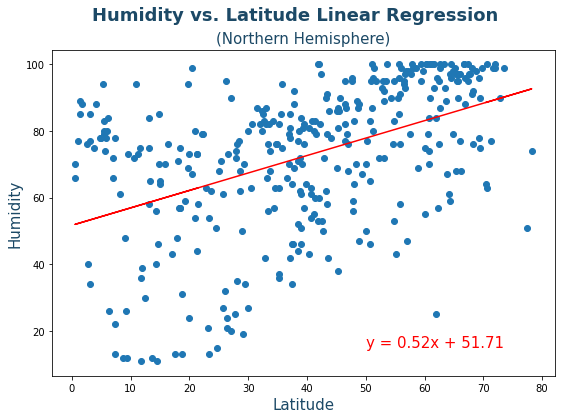

In [35]:
# Northern Hemisphere
# Call regression fcn
n_plot = linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Humidity"])

# Call annotate fcn
annotate(n_plot, 50,15)

# Set a title
plt.suptitle("Humidity vs. Latitude Linear Regression",fontsize = 18, fontweight="bold", color = "#1c4966")
plt.title("(Northern Hemisphere)",fontsize = 15, color = "#1c4966" )

# Set xlabel
plt.xlabel("Latitude", fontsize = 15, color = "#1c4966")

# Set ylabel
plt.ylabel("Humidity", fontsize = 15, color = "#1c4966")

# Save the figure
plt.savefig("output_data/N_Hemisphere_Humidity_vs._Lat.png")

# Show plot
plt.show()

**Discussion about the linear relationship:** There is a moderate positive correlation between latitude and humidity for the northern hemisphere.

The r-value is: 0.3892


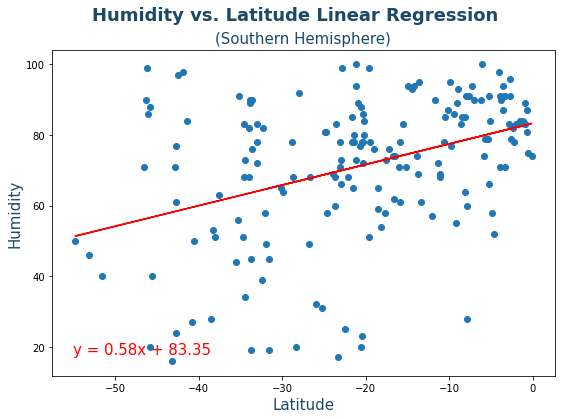

In [36]:
# Southern Hemisphere
# Call regression fcn
s_plot = linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Humidity"])

# Call annotate fcn
annotate(s_plot,-55,18)

# Set a title
plt.suptitle("Humidity vs. Latitude Linear Regression",fontsize = 18, fontweight="bold", color = "#1c4966")
plt.title("(Southern Hemisphere)",fontsize = 15, color = "#1c4966" )

# Set xlabel
plt.xlabel("Latitude", fontsize = 15, color = "#1c4966")

# Set ylabel
plt.ylabel("Humidity", fontsize = 15, color = "#1c4966")

# Save the figure
plt.savefig("output_data/S_Hemisphere_Humidity_vs._Lat.png")

# Show plot
plt.show()

**Discussion about the linear relationship:** There is a weak positive correlation between latitude and humidity for the southern hemisphere.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.2995


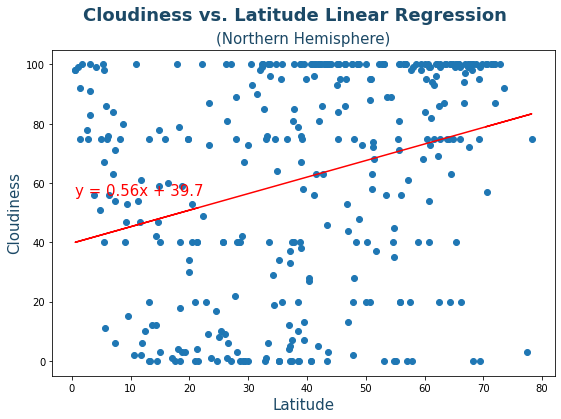

In [37]:
# Northern Hemisphere
# Call regression fcn
n_plot = linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"])

# Call annotate fcn
annotate(n_plot, 0.5,56)

# Set a title
plt.suptitle("Cloudiness vs. Latitude Linear Regression",fontsize = 18, fontweight="bold", color = "#1c4966")
plt.title("(Northern Hemisphere)",fontsize = 15, color = "#1c4966" )

# Set xlabel
plt.xlabel("Latitude", fontsize = 15, color = "#1c4966")

# Set ylabel
plt.ylabel("Cloudiness", fontsize = 15, color = "#1c4966")

# Save the figure
plt.savefig("output_data/N_Hemisphere_Cloudiness_vs._Lat.png")

# Show plot
plt.show()

**Discussion about the linear relationship:** There is a weak positive correlation between latitude and cloudiness for the northern hemisphere.

The r-value is: 0.3419


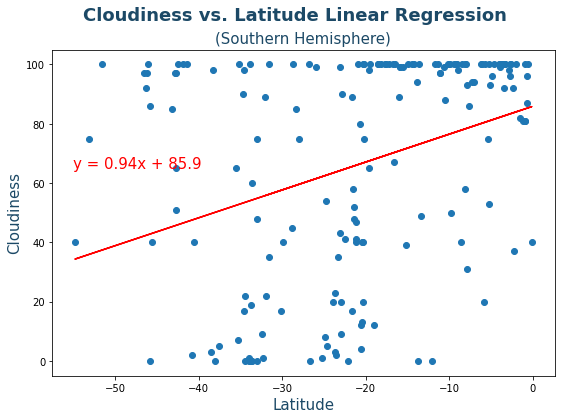

In [38]:
# Southern Hemisphere
# Call regression fcn
s_plot = linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"])

# Call annotate fcn
annotate(s_plot,-55,65)

# Set a title
plt.suptitle("Cloudiness vs. Latitude Linear Regression",fontsize = 18, fontweight="bold", color = "#1c4966")
plt.title("(Southern Hemisphere)",fontsize = 15, color = "#1c4966" )

# Set xlabel
plt.xlabel("Latitude", fontsize = 15, color = "#1c4966")

# Set ylabel
plt.ylabel("Cloudiness", fontsize = 15, color = "#1c4966")

# Save the figure
plt.savefig("output_data/S_Hemisphere_Cloudiness_vs._Lat.png")

# Show plot
plt.show()

**Discussion about the linear relationship:** There is a weak positive correlation between latitude and cloudiness for the southern hemisphere.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.0141


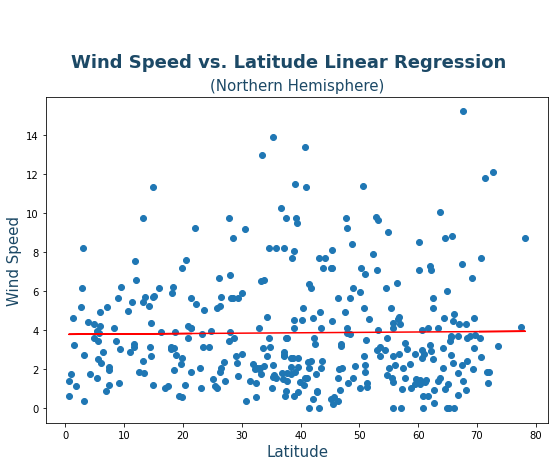

In [39]:
# Northern Hemisphere
# Call regression fcn
n_plot = linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"])

# Call annotate fcn
annotate(n_plot,10,20)

# Set a title
plt.suptitle("Wind Speed vs. Latitude Linear Regression",fontsize = 18, fontweight="bold", color = "#1c4966")
plt.title("(Northern Hemisphere)",fontsize = 15, color = "#1c4966" )

# Set xlabel
plt.xlabel("Latitude", fontsize = 15, color = "#1c4966")

# Set ylabel
plt.ylabel("Wind Speed", fontsize = 15, color = "#1c4966")

# Save the figure
plt.savefig("output_data/N_Hemisphere_WindSpeed_vs._Lat.png")

# Show plot
plt.show()

**Discussion about the linear relationship:** There is a very weak positive correlation(almost no correlation) between latitude and wind speed for the northern hemisphere.

The r-value is: -0.3588


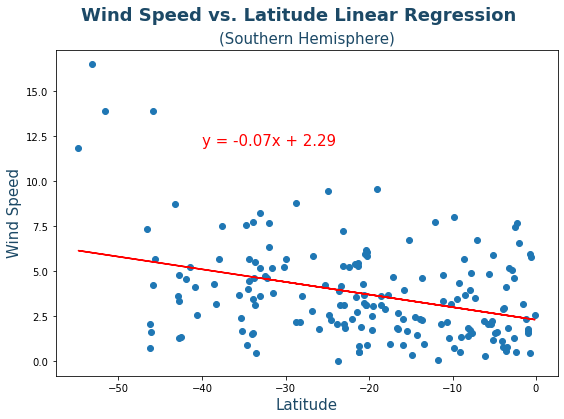

In [40]:
# Southern Hemisphere
# Call regression fcn
s_plot = linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"])

# Call annotate fcn
annotate(s_plot,-40,12)

# Set a title
plt.suptitle("Wind Speed vs. Latitude Linear Regression",fontsize = 18, fontweight="bold", color = "#1c4966")
plt.title("(Southern Hemisphere)",fontsize = 15, color = "#1c4966" )

# Set xlabel
plt.xlabel("Latitude", fontsize = 15, color = "#1c4966")

# Set ylabel
plt.ylabel("Wind Speed", fontsize = 15, color = "#1c4966")

# Save the figure
plt.savefig("output_data/S_Hemisphere_WindSpeed_vs._Lat.png")

# Show plot
plt.show()

**Discussion about the linear relationship:** There is a weak negative correlation between latitude and wind speed for the southern hemisphere.